<a href="https://colab.research.google.com/github/fake143love/data-visualization/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import utils
from sklearn import preprocessing
 

In [30]:
df=pd.read_csv("/content/archive (3).zip")
df.head()
for coln in df:
  df[coln]=df[coln].astype('category').cat.codes
df  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,-1,603,1711,72,7,210,274,2577
1,1111,1,1091,-1,409,426,1706,73,11,110,414,1762
2,2222,1,2651,2105,6296,-1,1706,73,11,0,242,7341
3,3333,1,3506,-1,-1,-1,1706,73,11,0,297,3617
4,4444,1,3861,-1,4815,251,1706,73,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,59,8,70,269,895
8803,8672,1,8773,-1,-1,-1,788,70,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,61,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,58,6,206,125,3315


In [47]:
x = df[["release_year","title","director","cast","country"]]
y = df[["type"]].astype('int')
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.45,random_state=10)
print (y_test)
y.info()

      type
659      1
6112     0
5950     0
6242     0
7160     0
...    ...
396      0
8067     0
3505     1
1288     0
7108     0

[3964 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   type    8807 non-null   int64
dtypes: int64(1)
memory usage: 68.9 KB


In [41]:
x = df.iloc[:,7]
y = df.iloc[:,1]
print(x,y)

0       72
1       73
2       73
3       73
4       73
        ..
8802    59
8803    70
8804    61
8805    58
8806    67
Name: release_year, Length: 8807, dtype: int8 0       0
1       1
2       1
3       1
4       1
       ..
8802    0
8803    1
8804    0
8805    0
8806    0
Name: type, Length: 8807, dtype: int8


In [48]:
st_x= StandardScaler() 
x_train = st_x.fit_transform(x_train)
y_train = st_x.transform(y_train)

In [ ]:
print (x_train,y_train)

[[-0.13444653]
 [-0.01973114]
 [ 0.20969964]
 ...
 [ 0.6685612 ]
 [ 0.20969964]
 [ 0.6685612 ]] [[ 0.43913042]
 [ 0.32441503]
 [-2.65818512]
 ...
 [ 0.55384581]
 [ 0.43913042]
 [ 0.43913042]]


In [50]:

classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x,y)
y_pred =classifier.predict(x)
print(y_pred)

[0 1 1 ... 0 0 0]


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm 

array([[6131,    0],
       [   0, 2676]])

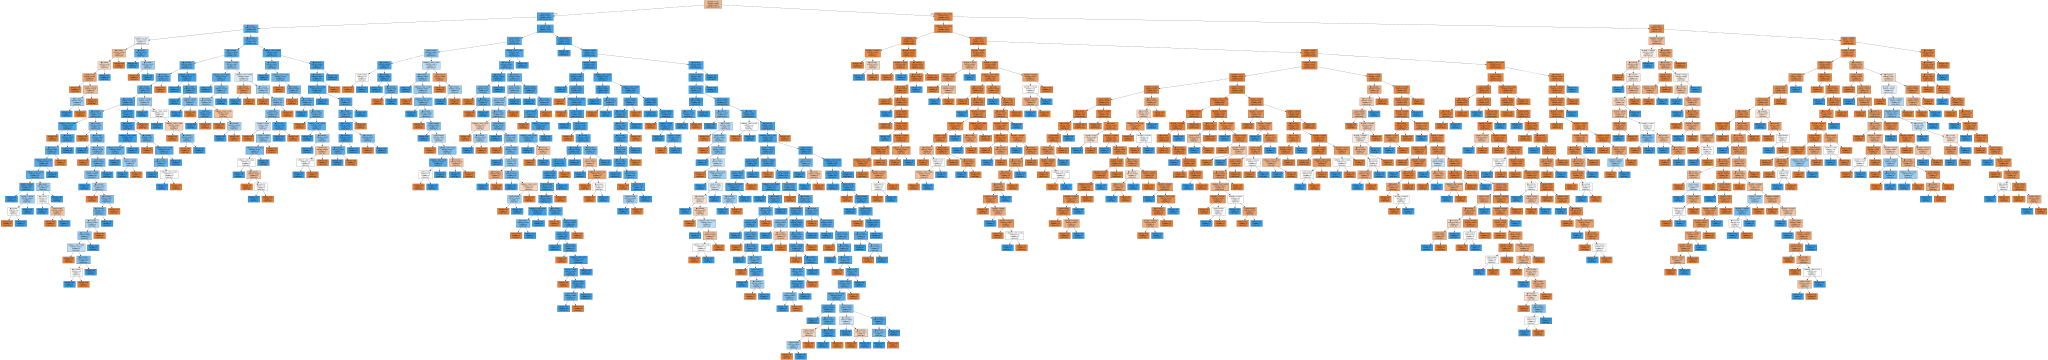

In [57]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(classifier,feature_names=x.columns,filled=True))